In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
amazon_ratings.shape

(2023070, 4)

# RECOMMENDATION SYSTEM 1

In [ ]:
#model based collaborative filtering technique
amazon_ratings1 = amazon_ratings.head(10000)

In [ ]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(9697, 886)

In [ ]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(886, 9697)

In [ ]:
X1 = X


In [ ]:
# DIMENTIONALITY REDUCTION - DECOMPOSING THE MATRIX
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
X.index[99]

'6117036094'

In [ ]:

i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [ ]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
#Recommending top 10 highly correlated products in sequence
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['1304511111',
 '1304622665',
 '1304624498',
 '130466578X',
 '1879187396',
 '6162751473',
 '6165151329',
 '8279995404',
 '9749377397']

# RECOMMENDATION 2

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
dataset = pd.read_csv('product_descriptions.csv')



In [ ]:
dataset

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
...,...,...
124423,224424,Create a neat yet stylish storage space for or...
124424,224425,Our Bullnose Adirondack Chair Cushions fit Adi...
124425,224426,Joist hangers are designed to provide support ...
124426,224427,These socket cap screws are ideal for applicat...


In [ ]:
# Text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and lower the text
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a sentence
    preprocessed_text = ' '.join(words)

    return preprocessed_text



In [ ]:
data['preprocessed_description'] = data['product_description'].apply(preprocess_text)


In [ ]:
data

In [ ]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['preprocessed_description'])

# Calculate the optimal number of clusters using the Elbow Method
def find_optimal_clusters(X, max_k):
    scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        scores.append(silhouette_score(X, kmeans.labels_))
    return scores.index(max(scores)) + 2



In [ ]:
# Find the optimal number of clusters
max_k = 10  # You can adjust this based on your dataset
optimal_clusters = find_optimal_clusters(X, max_k)

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)



KMeans(n_clusters=10, random_state=42)

In [ ]:
data['cluster_id'] = kmeans.fit_predict(X)

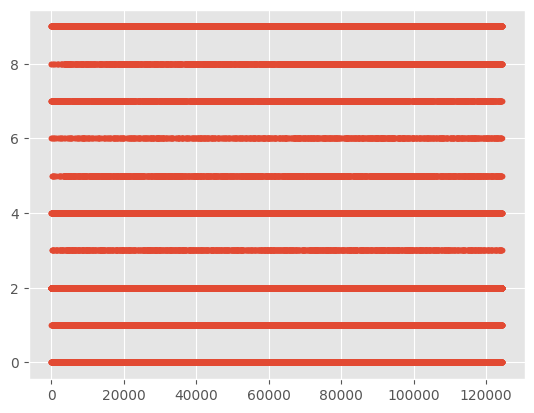

In [ ]:
plt.plot(data['cluster_id'], ".")
plt.show()

In [ ]:
# Recommendation function
def get_recommendations(word, vectorizer, kmeans, data):
    # Transform the word into a numerical vector using the vectorizer
    word_vector = vectorizer.transform([word])

    # Find the cluster of the word
    cluster_id = kmeans.predict(word_vector)[0]

    # Get other products in the same cluster
    similar_products = data[data['cluster_id'] == cluster_id]['product_description']

    return similar_products

# Example usage of the recommendation function
word = "steel"
similar_words = get_recommendations(word, vectorizer, kmeans, data)
print(similar_words)


3         The Grape Solar 265-Watt Polycrystalline PV So...
5         Achieving delicious results is almost effortle...
8         Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9         Valley View Industries Metal Stakes (4-Pack) a...
11        The 96 in. wide Caramel Simple Weave Rollup Ba...
                                ...                        
124413    Southwires Submersible Pump cable is used subm...
124414    Generacs new Protector Series diesel generator...
124418    Paracord is ideal for camping, hiking and othe...
124424    Our Bullnose Adirondack Chair Cushions fit Adi...
124425    Joist hangers are designed to provide support ...
Name: product_description, Length: 72133, dtype: object


In [ ]:
data[11:12]

,product_uid,product_description,preprocessed_description,cluster_id
11,100012,The 96 in. wide Caramel Simple Weave Rollup Ba...,96 wide caramel simple weave rollup bamboo sha...,2


In [ ]:
data[5:6]

,product_uid,product_description,preprocessed_description,cluster_id
5,100006,Achieving delicious results is almost effortle...,achieving delicious result almost effortless w...,2


In [ ]:
from sklearn.decomposition import PCA

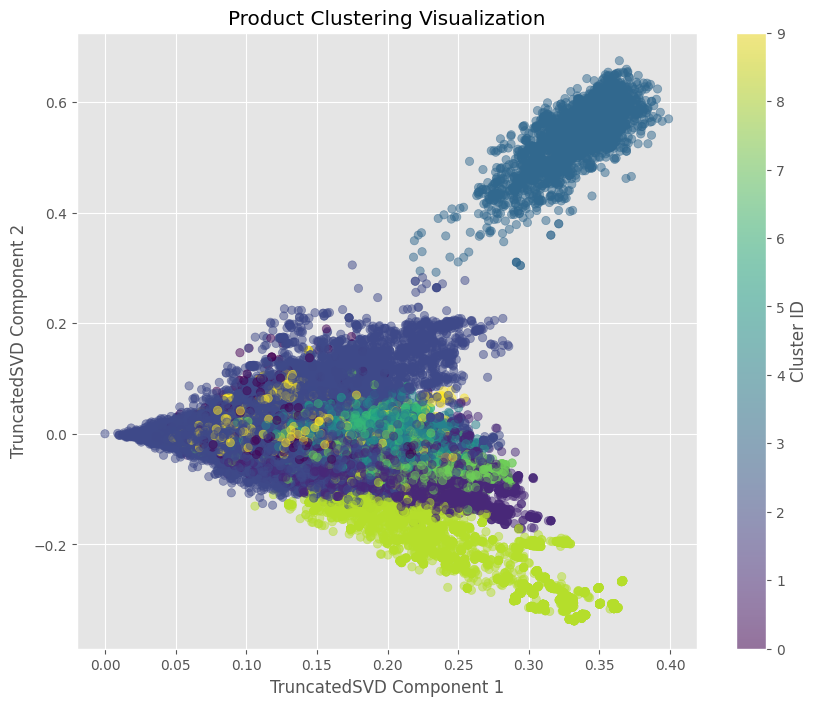

In [ ]:

# Reduce dimensionality for visualization using TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=data['cluster_id'], cmap='viridis', alpha=0.5)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.title('Product Clustering Visualization')
plt.colorbar(label='Cluster ID')
plt.show()




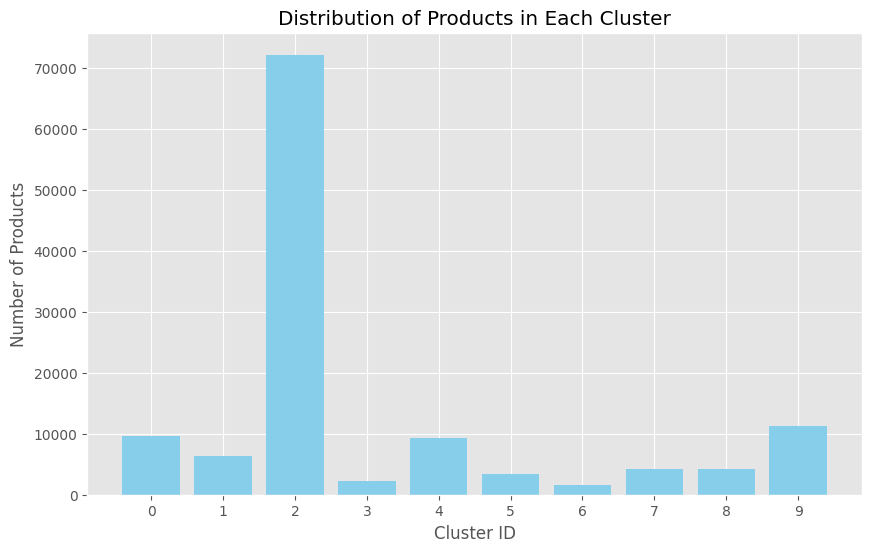

In [ ]:
import matplotlib.pyplot as plt

# Count the number of products in each cluster
cluster_counts = data['cluster_id'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, align='center', color='skyblue')
plt.xticks(cluster_counts.index)
plt.xlabel('Cluster ID')
plt.ylabel('Number of Products')
plt.title('Distribution of Products in Each Cluster')
plt.show()

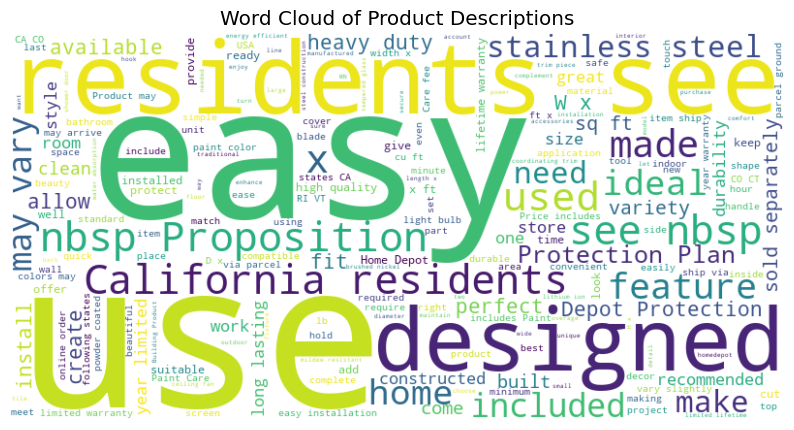

In [ ]:
from wordcloud import WordCloud

# Concatenate all product descriptions into a single text
all_descriptions = ' '.join(data['product_description'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Descriptions')
plt.show()

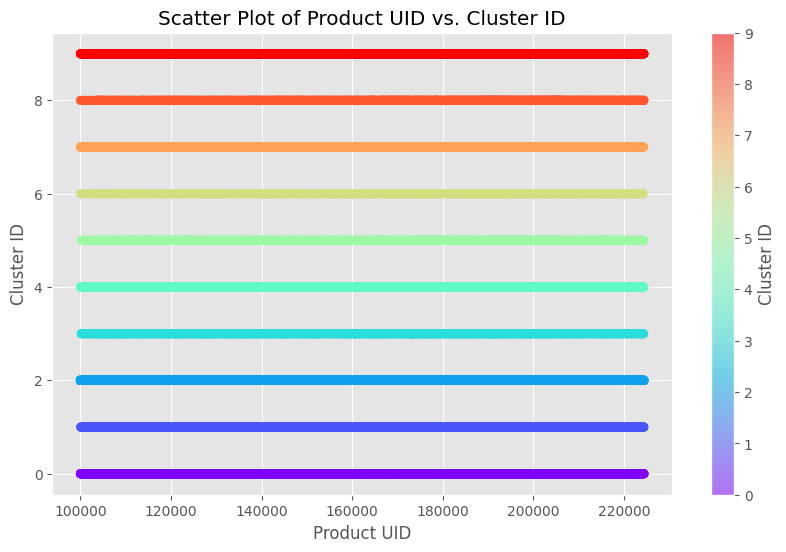

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['product_uid'], data['cluster_id'], c=data['cluster_id'], cmap='rainbow', alpha=0.5)
plt.xlabel('Product UID')
plt.ylabel('Cluster ID')
plt.title('Scatter Plot of Product UID vs. Cluster ID')
plt.colorbar(label='Cluster ID')
plt.show()

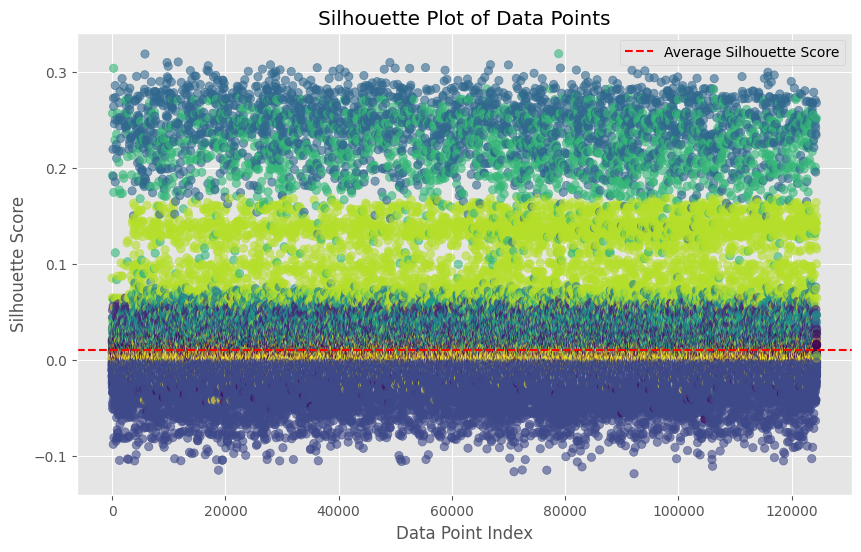

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate the silhouette scores for each data point
silhouette_values = silhouette_samples(X, kmeans.labels_)

# Calculate the overall silhouette score for the clustering
average_silhouette_score = silhouette_score(X, kmeans.labels_)

# Create a silhouette plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), silhouette_values, c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.axhline(y=average_silhouette_score, color='red', linestyle='--', label='Average Silhouette Score')
plt.xlabel('Data Point Index')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot of Data Points')
plt.legend()
plt.show()


# RECOMENDATION 3

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv('product_descriptions.csv')

In [ ]:
# Text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and lower the text
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a sentence
    preprocessed_text = ' '.join(words)

    return preprocessed_text


In [ ]:
data['preprocessed_description'] = data['product_description'].apply(preprocess_text)

data.head()

,product_uid,product_description,preprocessed_description
0,100001,"Not only do angles make joints stronger, they ...",angle make joint stronger also provide consist...
1,100002,BEHR Premium Textured DECKOVER is an innovativ...,behr premium textured deckover innovative soli...
2,100003,Classic architecture meets contemporary design...,classic architecture meet contemporary design ...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...,grape solar 265 watt polycrystalline pv solar ...
4,100005,Update your bathroom with the Delta Vero Singl...,update bathroom delta vero single handle showe...


In [ ]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['preprocessed_description'])


In [ ]:
# Perform clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['cluster_id'] = dbscan.fit_predict(X)

In [ ]:
# Function to get product recommendations based on a given word
def get_recommendations(word):
    word_vector = vectorizer.transform([word])
    cluster_id = dbscan.fit_predict(word_vector)[0]
    similar_products = data[data['cluster_id'] == cluster_id]['product_description']
    return similar_products

# Example usage of the recommendation function
word = "stainless"
similar_products = get_recommendations(word)
print(similar_products)

2         Classic architecture meets contemporary design...
3         The Grape Solar 265-Watt Polycrystalline PV So...
4         Update your bathroom with the Delta Vero Singl...
6         The Quantum Adjustable 2-Light LED Black Emerg...
7         The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
                                ...                        
124418    Paracord is ideal for camping, hiking and othe...
124423    Create a neat yet stylish storage space for or...
124424    Our Bullnose Adirondack Chair Cushions fit Adi...
124425    Joist hangers are designed to provide support ...
124427    The Bosch quick change bi-metal hole saws feat...
Name: product_description, Length: 92225, dtype: object


In [ ]:
data[2:3]

,product_uid,product_description,preprocessed_description,cluster_id
2,100003,Classic architecture meets contemporary design...,classic architecture meet contemporary design ...,-1


In [ ]:
data[6:7]

,product_uid,product_description,preprocessed_description,cluster_id
6,100007,The Quantum Adjustable 2-Light LED Black Emerg...,quantum adjustable 2 light led black emergency...,-1


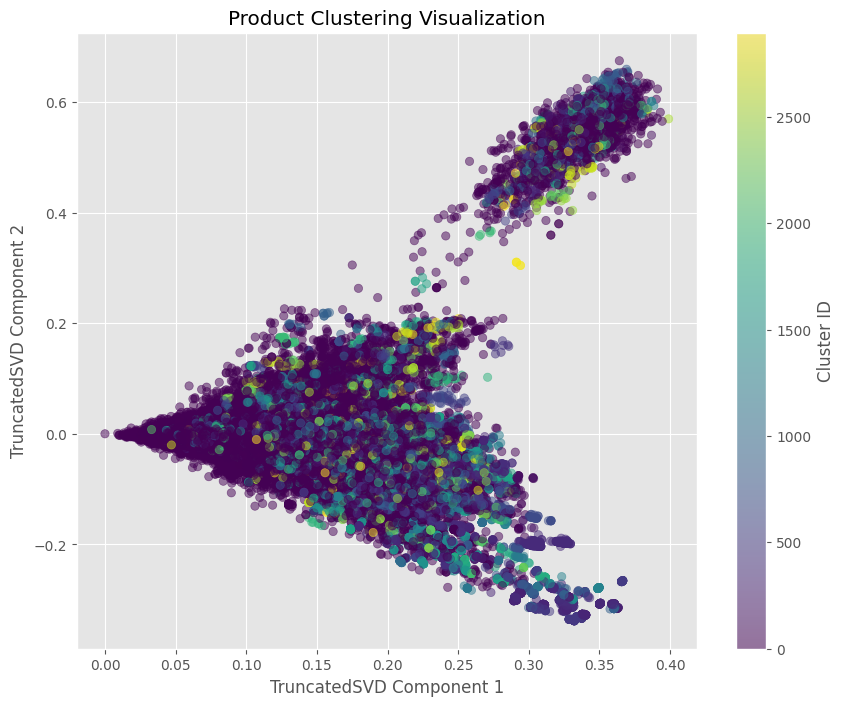

In [ ]:

# Reduce dimensionality for visualization using TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=data['cluster_id'], cmap='viridis', alpha=0.5)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.title('Product Clustering Visualization')
plt.colorbar(label='Cluster ID')
plt.show()

